# **CNN, 컨볼루션 신경망(합성곱 신경망)**

이미지 분류에 탁월한 성능을 가지는 신경망

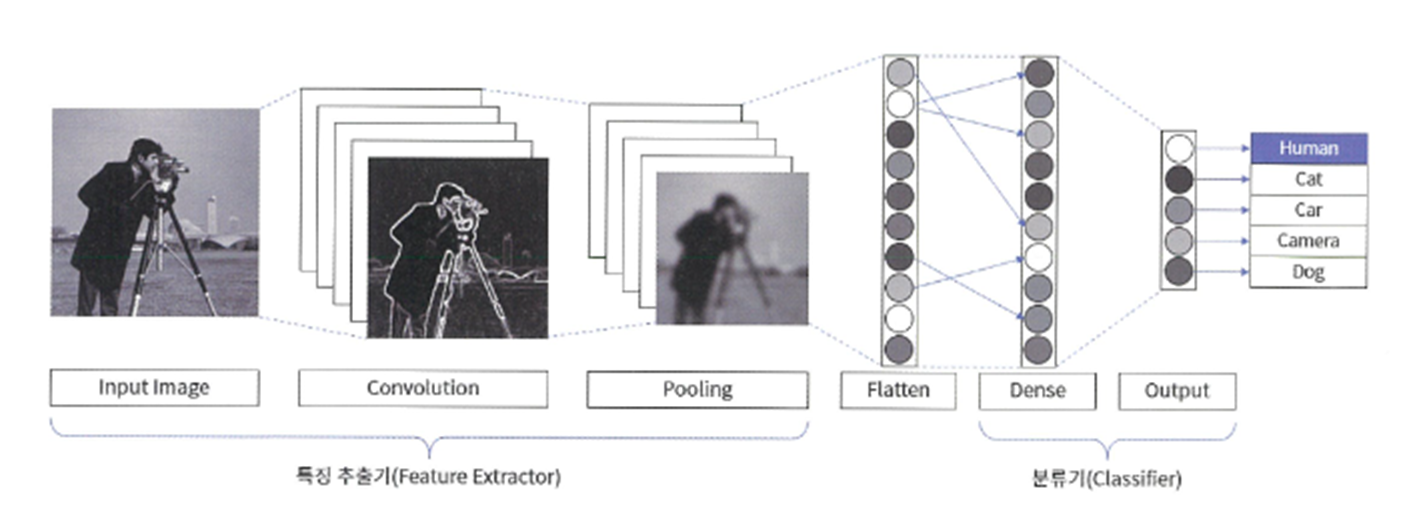

컨불루션 레이어 >
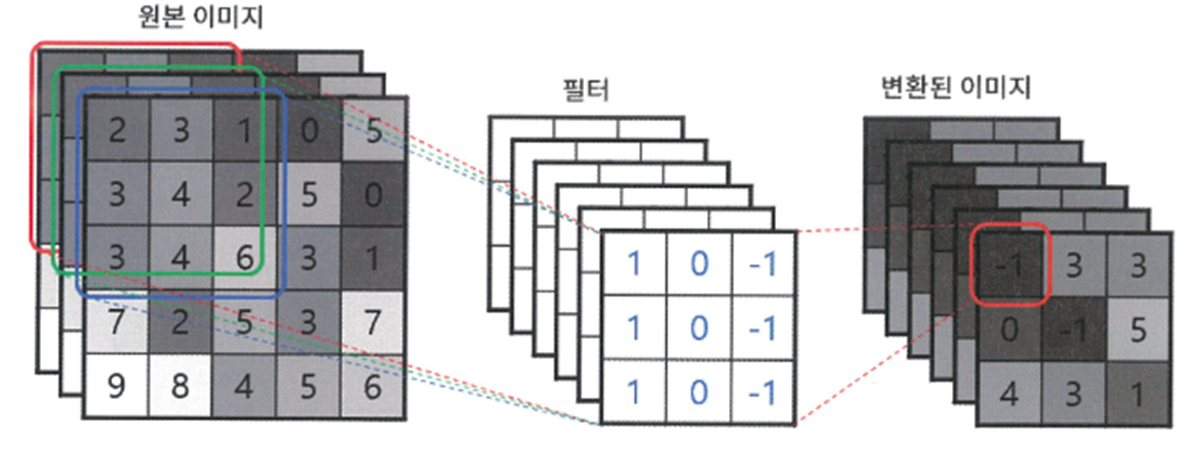



> Convolution Layer

이미지에서 필터를 사용해 특징을 극대화하는 레이어이다.<br>
필터는 네트워크 학습을 통해 자동으로 추출하고, 사용자는 필터 개수만 정한다.<br>
이러한 컨볼루션 레이어는 새로운 이미지를 만들어낸다.

```
# 이미지를 다루는 컨볼루션 레이어 생성
tf.keras.layers.Conv2D(kernel_size, strides, padding, filters)
```
 <font size="2em" color="gray">
kernel_size : 필터 행렬의 크기 (튜플, (높이, 너비)) <br>
strides : 필터가 계산 과정에서 한 스텝마다 이동하는 크기, 결과 이미지 크기에 영향을 준다. (기본값 (1,1))<br>
padding : valid 또는 same으로, same의 경우는 이미지 주변에 빈 값을 넣어 크기를 보존하고 vaild는 그렇지 않다.<br>
filters : 필터의 개수. 많으면 과적합 발생. 보통 레이어 수가 증가할 때마다 필터 수를 두 배로 늘린다.
</font>

> Pooling Layer

풀링 레이어는 데이터의 크기를 줄여주면서 중요한 정보를 남기는 레이어로, MaxPool2D와 AveragePool2D가 존재하지만 컨볼루션 레이어는 MaxPool2D가 선호된다.
<br>
가중치가 없기에 학습되는게 아니고, 네트워크 구조에 따라 생략할 수도 있다.

```
# MaxPool2D 레이어 생성 코드
tf.keras.layers.MaxPool2D(pool_size, strides)
```
<font size="2em" color="gray">
pool_size : Max 연산을 수행할 범위 <br>
strides : 필터가 계산 과정에서 한 스텝마다 이동하는 크기, 결과 이미지 크기에 영향을 준다. (기본값 (1,1))<br>
</font>



> Dropout Layer

과적합을 막기 위해 학습과정에서만 무작위로 뉴런의 연결을 끊는 것이다.<br>
역시 가중치가 없기에 학습되지 않는다.

```
#드롭아웃 레이어 생성
tf.keras.layers.Dropout(rate=0.3)
```
<font size="2em" color="gray">
rate : 끊어버릴 뉴런 수
</font>




> MNIST 데이터셋

Tensorflow에서 제공하는 데이터셋



In [1]:
#데이터 가져오기

import tensorflow as tf

fashion_mnist=tf.keras.datasets.fashion_mnist # 데이터 셋을 가지고 옵니다.
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data() 

train_x=train_x/255.0 # 데이터 스케일을 줄여 과적합을 방지하는 이미지 노말라이징이라 합니다.
test_x=test_x/255.0

print(train_x.shape,test_x.shape) # 이미지 차원 크기를 알 수 있습니다.

train_x=train_x.reshape(-1,28,28,1)# 컨볼루션 레이어는 기본적으로 채널이 있어야합니다.
test_x=test_x.reshape(-1,28,28,1)

print(train_x.shape,test_x.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


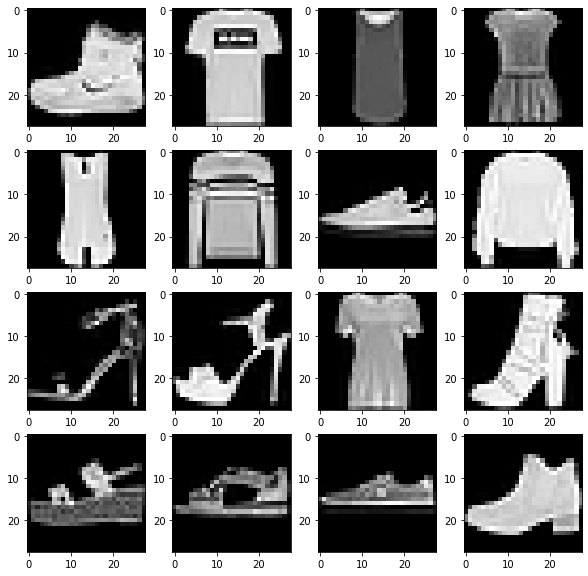

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [2]:
#데이터셋 확인

import matplotlib.pyplot as plt
# 전체 그래프의 크기를 width=10,height=10으로 지정합니다.
plt.figure(figsize=(10,10))
for c in range(16):
	# 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다.
	plt.subplot(4,4,c+1)
	plt.imshow(train_x[c].reshape(28,28),cmap='gray')
plt.show()
# 훈련 데이터의 첫 번째~16번째 까지의 라벨을 프린트합니다.
print(train_y[:16])


In [3]:
#모델 구성

model=tf.keras.Sequential([
	tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,
						padding='same',activation='relu'),
	tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64,padding='same',activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2,2)),
	tf.keras.layers.Dropout(rate=0.5),
	tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128,padding='same',activation='relu'),
	tf.keras.layers.Conv2D(kernel_size=(3,3),filters=256,padding='same',activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2,2)),
	tf.keras.layers.Dropout(rate=0.5),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(units=512,activation='relu'),
	tf.keras.layers.Dropout(rate=0.5),
	tf.keras.layers.Dense(units=256,activation='relu'),
	tf.keras.layers.Dropout(rate=0.5),
	tf.keras.layers.Dense(units=10,activation='softmax') #소프트멕스 함수 : 값을 확률로 표시
])

model.compile(optimizer=tf.keras.optimizers.Adam(), # 가장 많이 쓰는 최적화 함수
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy']) # 성공률 추가
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 256)       295168    
                                                        

In [4]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 840s 595ms/step - loss: 0.5653 - accuracy: 0.7979 - val_loss: 0.3232 - val_accuracy: 0.8766
Epoch 2/25
1407/1407 [==============================] - 832s 591ms/step - loss: 0.3651 - accuracy: 0.8710 - val_loss: 0.2784 - val_accuracy: 0.8957
Epoch 3/25
1407/1407 [==============================] - 836s 594ms/step - loss: 0.3203 - accuracy: 0.8852 - val_loss: 0.2511 - val_accuracy: 0.9080
Epoch 4/25
1407/1407 [==============================] - 823s 585ms/step - loss: 0.2981 - accuracy: 0.8946 - val_loss: 0.2508 - val_accuracy: 0.9109
Epoch 5/25
1407/1407 [==============================] - 826s 587ms/step - loss: 0.2886 - accuracy: 0.8977 - val_loss: 0.2416 - val_accuracy: 0.9096
Epoch 6/25
1407/1407 [==============================] - 838s 596ms/step - loss: 0.2721 - accuracy: 0.9018 - val_loss: 0.2321 - val_accuracy: 0.9119
Epoch 7/25
1407/1407 [==============================] - 834s 593ms/step - loss: 0.2608 - accuracy: 0.9072 - val_

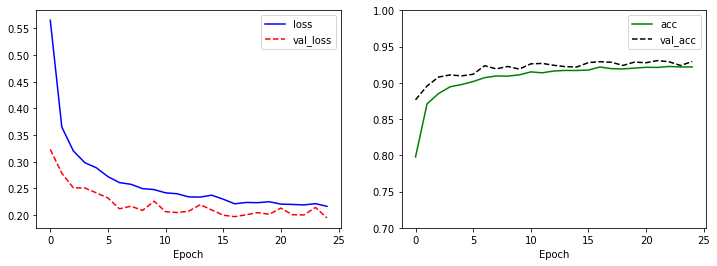

In [5]:
#학습된 정보를 그래프로 보여주기
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

#손실값 그래프
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

#정확도 그래프
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='acc')
plt.plot(history.history['val_accuracy'],'k--',label='val_acc')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()
